# Uncovering Employee Satisfaction Trends: An Analysis of DETE and TAFE Exit Surveys

This project aims to analyze exit surveys from the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institutes in Queensland, Australia. Our goal is to identify potential reasons for employee resignations, with a specific focus on factors such as length of service and age.

After conducting data cleaning, exploratory data analysis, and data visualization techniques on the DETE and TAFE datasets obtained from dataquest.io, we have identified some interesting trends. Our analysis shows that employees who have been working in the institutes for a longer period of time tend to resign with some level of dissatisfaction, while new employees tend to resign rather satisfied.

Additionally, we found that people approaching retirement may feel somewhat dissatisfied when they resign, while young employees are by far the most satisfied category. These findings might be valuable insights for both the DETE and TAFE institutes and can inform potential interventions to improve employee satisfaction and retention.

In [66]:
# Importing required libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.style as style

In [67]:
# Reading the data sets
dete = pd.read_csv('dete_survey.csv', na_values='Not Stated')
tafe = pd.read_csv('tafe_survey.csv')

## Cleaning the Data

In [68]:
# Snapshot of dete data set
dete

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817,819,Age Retirement,02/2014,1977.0,1999.0,Teacher,Primary,Central Queensland,NaN,Permanent Part-time,...,A,A,SA,Female,56-60,NaN,NaN,NaN,NaN,NaN
818,820,Age Retirement,01/2014,1980.0,1980.0,Teacher,Secondary,North Coast,NaN,Permanent Full-time,...,N,N,N,Male,51-55,NaN,NaN,NaN,NaN,NaN
819,821,Resignation-Move overseas/interstate,01/2014,2009.0,2009.0,Public Servant,A01-A04,Central Office,Education Queensland,Permanent Full-time,...,A,N,A,Female,31-35,NaN,NaN,NaN,NaN,NaN
820,822,Ill Health Retirement,12/2013,2001.0,2009.0,Teacher,Secondary,Darling Downs South West,NaN,Permanent Full-time,...,A,N,A,Female,41-45,NaN,NaN,NaN,NaN,NaN


In [69]:
dete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   822 non-null    int64  
 1   SeparationType                       822 non-null    object 
 2   Cease Date                           788 non-null    object 
 3   DETE Start Date                      749 non-null    float64
 4   Role Start Date                      724 non-null    float64
 5   Position                             817 non-null    object 
 6   Classification                       455 non-null    object 
 7   Region                               717 non-null    object 
 8   Business Unit                        126 non-null    object 
 9   Employment Status                    817 non-null    object 
 10  Career move to public sector         822 non-null    bool   
 11  Career move to private sector   

In [70]:
dete.nunique()

ID                                     822
SeparationType                           9
Cease Date                              24
DETE Start Date                         50
Role Start Date                         45
Position                                15
Classification                           8
Region                                   8
Business Unit                           14
Employment Status                        5
Career move to public sector             2
Career move to private sector            2
Interpersonal conflicts                  2
Job dissatisfaction                      2
Dissatisfaction with the department      2
Physical work environment                2
Lack of recognition                      2
Lack of job security                     2
Work location                            2
Employment conditions                    2
Maternity/family                         2
Relocation                               2
Study/Travel                             2
Ill Health 

In [71]:
dete.iloc[0:5,28:49]

,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,...,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety
0,A,A,N,N,N,A,A,A,A,N,...,N,A,A,A,N,A,A,N,N,N
1,A,A,N,N,N,N,A,A,A,N,...,N,A,A,A,N,A,A,N,N,N
2,N,N,N,N,N,N,N,N,N,N,...,N,N,N,N,A,A,N,N,N,N
3,A,N,N,N,A,A,N,N,A,A,...,A,A,A,A,A,A,A,A,N,A
4,A,A,N,N,D,D,N,A,A,A,...,A,A,SA,SA,D,D,A,N,A,M


Most columns are categorical variables with characteristics of the resigning employee that are not required for the project's goal.

In [72]:
dete.iloc[0:5,10:28]

,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above
0,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False


These are the columns that we will need, specifying the causes of resignation.

In [73]:
# Deleting columns we don't need (28-48)
dete.drop(dete.columns[28:49], axis=1, inplace=True)
dete

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Work life balance,Workload,None of the above,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817,819,Age Retirement,02/2014,1977.0,1999.0,Teacher,Primary,Central Queensland,NaN,Permanent Part-time,...,False,True,False,Female,56-60,NaN,NaN,NaN,NaN,NaN
818,820,Age Retirement,01/2014,1980.0,1980.0,Teacher,Secondary,North Coast,NaN,Permanent Full-time,...,False,False,True,Male,51-55,NaN,NaN,NaN,NaN,NaN
819,821,Resignation-Move overseas/interstate,01/2014,2009.0,2009.0,Public Servant,A01-A04,Central Office,Education Queensland,Permanent Full-time,...,True,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
820,822,Ill Health Retirement,12/2013,2001.0,2009.0,Teacher,Secondary,Darling Downs South West,NaN,Permanent Full-time,...,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN


In [74]:
# Snapshot of tafe data set
tafe

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,6.350668e+17,Barrier Reef Institute of TAFE,Delivery (teaching),2013.0,Resignation,Career Move - Public Sector,-,-,-,-,...,Yes,Yes,Yes,Yes,Male,51-55,Temporary Full-time,Teacher (including LVT),1-2,1-2
698,6.350677e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2013.0,Resignation,Career Move - Public Sector,-,-,-,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
699,6.350704e+17,Tropical North Institute of TAFE,Delivery (teaching),2013.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,Female,51-55,Permanent Full-time,Teacher (including LVT),5-6,1-2
700,6.350712e+17,Southbank Institute of Technology,Non-Delivery (corporate),2013.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,No,No,Yes,No,Female,41 45,Temporary Full-time,Professional Officer (PO),1-2,1-2


In [75]:
tafe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In [76]:
tafe.nunique()

Record ID                                                                    702
Institute                                                                     12
WorkArea                                                                       2
CESSATION YEAR                                                                 5
Reason for ceasing employment                                                  6
                                                                            ... 
CurrentAge. Current Age                                                        9
Employment Type. Employment Type                                               5
Classification. Classification                                                 9
LengthofServiceOverall. Overall Length of Service at Institute (in years)      7
LengthofServiceCurrent. Length of Service at current workplace (in years)      7
Length: 72, dtype: int64

Contributing factors for the resignation that we are interested in are stored in columns 5-17.

In [77]:
tafe.columns[18:66]

Index(['InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction',
       'InstituteViews. Topic:2. I was given access to skills training to help me do my job better',
       'InstituteViews. Topic:3. I was given adequate opportunities for personal development',
       'InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%',
       'InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had',
       'InstituteViews. Topic:6. The organisation recognised when staff did good work',
       'InstituteViews. Topic:7. Management was generally supportive of me',
       'InstituteViews. Topic:8. Management was generally supportive of my team',
       'InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me',
       'InstituteViews. Topic:10. Staff morale was positive within the Institute',
       'InstituteViews. Topic:11. If I had a work

In [78]:
# Deleting columns we don't need (17-66)
tafe.drop(tafe.columns[18:66], axis=1, inplace=True)
tafe

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,NaN,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,6.350668e+17,Barrier Reef Institute of TAFE,Delivery (teaching),2013.0,Resignation,Career Move - Public Sector,-,-,-,-,...,-,-,-,NaN,Male,51-55,Temporary Full-time,Teacher (including LVT),1-2,1-2
698,6.350677e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2013.0,Resignation,Career Move - Public Sector,-,-,-,-,...,-,-,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN
699,6.350704e+17,Tropical North Institute of TAFE,Delivery (teaching),2013.0,Resignation,-,-,-,-,-,...,-,Other,-,NaN,Female,51-55,Permanent Full-time,Teacher (including LVT),5-6,1-2
700,6.350712e+17,Southbank Institute of Technology,Non-Delivery (corporate),2013.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,41 45,Temporary Full-time,Professional Officer (PO),1-2,1-2


### Cleaning column names

Each dataframe contains many of the same columns, but the column names are different. We will standardize them for combining them later.

In [79]:
# Cleaning column names in dete
dete.columns = dete.columns.str.lower().str.strip().str.replace(' ', '_')
dete.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [80]:
# Cleaning and renaming column names in tafe
tafe.rename({'Record ID': 'id',
'CESSATION YEAR': 'cease_date',
'Reason for ceasing employment': 'separationtype',
'Gender. What is your Gender?': 'gender',
'CurrentAge. Current Age': 'age',
'Employment Type. Employment Type': 'employment_status',
'Classification. Classification': 'position',
'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}, axis=1, inplace=True)
tafe.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Main Factor. Which of these was the main factor for leaving?',
       'gender', 'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

### Filtering the Data

Since we are interested only in people who resigned from the job, we will inspect separationtype column to try and reduce datasets further.

In [81]:
dete['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

There are three types of separation in dete that correspond to resignation.

In [82]:
# Selecting only rows that contain resignation as type of separation with the employee
dete_resigned = dete.copy()[dete['separationtype'].str.contains('Resignation')]
dete_resigned

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation-Other reasons,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
8,9,Resignation-Other reasons,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation-Other employer,2012,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
11,12,Resignation-Move overseas/interstate,2012,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,810,Resignation-Other reasons,12/2013,2010.0,2010.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,False,Female,26-30,NaN,NaN,NaN,NaN,NaN
815,817,Resignation-Other employer,01/2014,2012.0,2012.0,Teacher,Primary,Far North Queensland,NaN,Permanent Full-time,...,False,False,False,Male,21-25,NaN,NaN,NaN,NaN,NaN
816,818,Resignation-Move overseas/interstate,01/2014,2012.0,2012.0,Teacher,Secondary,North Coast,NaN,Permanent Full-time,...,False,False,False,Female,21-25,NaN,NaN,NaN,NaN,NaN
819,821,Resignation-Move overseas/interstate,01/2014,2009.0,2009.0,Public Servant,A01-A04,Central Office,Education Queensland,Permanent Full-time,...,True,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN


In [83]:
tafe['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In tafe there is one type of separation we are interested in.

In [84]:
# Selecting only rows that have Resignation data
tafe_resigned = tafe.copy()[tafe['separationtype']=='Resignation']
tafe_resigned

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,gender,age,employment_status,position,institute_service,role_service
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,NaN,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,Other,-,NaN,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,-,Other,-,Career Move - Private Sector,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,Other,-,NaN,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,6.350660e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2013.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,NaN,Male,21 25,Temporary Full-time,Operational (OO),5-6,5-6
697,6.350668e+17,Barrier Reef Institute of TAFE,Delivery (teaching),2013.0,Resignation,Career Move - Public Sector,-,-,-,-,...,-,-,-,NaN,Male,51-55,Temporary Full-time,Teacher (including LVT),1-2,1-2
698,6.350677e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2013.0,Resignation,Career Move - Public Sector,-,-,-,-,...,-,-,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN
699,6.350704e+17,Tropical North Institute of TAFE,Delivery (teaching),2013.0,Resignation,-,-,-,-,-,...,-,Other,-,NaN,Female,51-55,Permanent Full-time,Teacher (including LVT),5-6,1-2


### Verifying the Years Data

In [85]:
# Checking the years in each dataframe for logical inconsistencies

dete_resigned['cease_date'].value_counts(dropna=False)

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
NaN         11
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
09/2010      1
07/2012      1
2010         1
07/2006      1
Name: cease_date, dtype: int64

In [86]:
# Extracting the years and converting them to float
dete_resigned['cease_date'] = dete_resigned['cease_date'].str[-4:].astype('float')

In [87]:
dete_resigned['dete_start_date'].value_counts(dropna=False).sort_index()

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
NaN       28
Name: dete_start_date, dtype: int64

In [88]:
tafe_resigned['cease_date'].value_counts(dropna=False)

2011.0    116
2012.0     94
2010.0     68
2013.0     55
NaN         5
2009.0      2
Name: cease_date, dtype: int64

Distribution of dates looks ok.

### Aligning the Years

We will create insitute_service column in dete dataset, similar to tafe dataset.

In [89]:
dete_resigned['institute_service'] = dete_resigned['cease_date'] - dete_resigned['dete_start_date']
dete_resigned

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service
3,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0
5,6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0
8,9,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0
9,10,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0
11,12,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,810,Resignation-Other reasons,2013.0,2010.0,2010.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,Female,26-30,NaN,NaN,NaN,NaN,NaN,3.0
815,817,Resignation-Other employer,2014.0,2012.0,2012.0,Teacher,Primary,Far North Queensland,NaN,Permanent Full-time,...,False,False,Male,21-25,NaN,NaN,NaN,NaN,NaN,2.0
816,818,Resignation-Move overseas/interstate,2014.0,2012.0,2012.0,Teacher,Secondary,North Coast,NaN,Permanent Full-time,...,False,False,Female,21-25,NaN,NaN,NaN,NaN,NaN,2.0
819,821,Resignation-Move overseas/interstate,2014.0,2009.0,2009.0,Public Servant,A01-A04,Central Office,Education Queensland,Permanent Full-time,...,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,5.0


### Identifying Dissatisfied Employees

Next, we'll identify any employees who resigned because they were dissatisfied.
If employee indicated any of the following factors caused them to resign, we'll mark them as dissatisfied.

For tafe dataset:
- Contributing Factors. Dissatisfaction
- Contributing Factors. Job Dissatisfaction

For dete dataset:
- job_dissatisfaction
- dissatisfaction_with_the_department
- physical_work_environment
- lack_of_recognition
- lack_of_job_security
- work_location
- employment_conditions
- work_life_balance
- workload

In [90]:
# Snapshots of factors for tafe
tafe_resigned['Contributing Factors. Dissatisfaction'].value_counts(dropna=False)

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [91]:
tafe_resigned['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False)

-                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

We will sum the columns, and replace values for False if both columns contain '-', for NaN if both contain Nan, and True otherwise.

In [92]:
tafe_resigned['dissatisfied'] = tafe_resigned['Contributing Factors. Dissatisfaction'] + tafe_resigned['Contributing Factors. Job Dissatisfaction']

In [93]:
# Replacing the values
tafe_resigned['dissatisfied'].replace({'--':False,
             'NaN':'Nan',
             r'\bDissatisfaction\b|^Dissatisfaction$|Dissatisfaction':True}, inplace=True, regex=True)

In [94]:
tafe_resigned['dissatisfied'].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

Columns we are interested in dete dataset are already boolean, so we can compare them directly.

In [95]:
dete_diss = dete_resigned.iloc[:, list(range(13, 20)) + list(range(25,27))]
dete_diss

,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,work_life_balance,workload
3,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,True,False,False
8,False,False,False,False,False,False,False,False,False
9,True,True,False,False,False,False,False,False,False
11,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
808,False,False,False,False,False,False,False,False,False
815,False,False,False,False,False,False,False,False,False
816,False,False,False,False,False,False,False,False,False
819,False,False,False,False,False,False,False,True,False


In [96]:
# If any of the columns contains True, the result in the new column will also be True
dete_resigned['dissatisfied'] = dete_diss.any(axis=1, skipna=False)
dete_resigned['dissatisfied'].value_counts()

False    162
True     149
Name: dissatisfied, dtype: int64

Before combining the datasets, we select only the columns that we will need further considering the focus of this project (satisfaction level, id, age, gender, dates).

In [97]:
dete_resigned

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service,dissatisfied
3,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0,False
5,6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0,True
8,9,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0,False
9,10,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0,True
11,12,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,810,Resignation-Other reasons,2013.0,2010.0,2010.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,Female,26-30,NaN,NaN,NaN,NaN,NaN,3.0,False
815,817,Resignation-Other employer,2014.0,2012.0,2012.0,Teacher,Primary,Far North Queensland,NaN,Permanent Full-time,...,False,Male,21-25,NaN,NaN,NaN,NaN,NaN,2.0,False
816,818,Resignation-Move overseas/interstate,2014.0,2012.0,2012.0,Teacher,Secondary,North Coast,NaN,Permanent Full-time,...,False,Female,21-25,NaN,NaN,NaN,NaN,NaN,2.0,False
819,821,Resignation-Move overseas/interstate,2014.0,2009.0,2009.0,Public Servant,A01-A04,Central Office,Education Queensland,Permanent Full-time,...,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,5.0,True


In [98]:
# Selecting columns from dete
dete_clean = dete_resigned.copy().iloc[:,[0]+list(range(2,5))+[28]+[29]+[35]+[36]]

In [99]:
# Adding the column institute to distinguish between datasets
dete_clean['institute'] = 'DETE'

In [100]:
dete_clean

,id,cease_date,dete_start_date,role_start_date,gender,age,institute_service,dissatisfied,institute
3,4,2012.0,2005.0,2006.0,Female,36-40,7.0,False,DETE
5,6,2012.0,1994.0,1997.0,Female,41-45,18.0,True,DETE
8,9,2012.0,2009.0,2009.0,Female,31-35,3.0,False,DETE
9,10,2012.0,1997.0,2008.0,Female,46-50,15.0,True,DETE
11,12,2012.0,2009.0,2009.0,Male,31-35,3.0,False,DETE
...,...,...,...,...,...,...,...,...,...
808,810,2013.0,2010.0,2010.0,Female,26-30,3.0,False,DETE
815,817,2014.0,2012.0,2012.0,Male,21-25,2.0,False,DETE
816,818,2014.0,2012.0,2012.0,Female,21-25,2.0,False,DETE
819,821,2014.0,2009.0,2009.0,Female,31-35,5.0,True,DETE


In [101]:
# Selecting columns from tafe
tafe_clean = tafe_resigned.copy().iloc[:,[0]+[3]+[18]+[19]+[22]+[23]+[24]]

In [102]:
# Adding the column institute
tafe_clean['institute'] = 'TAFE'
tafe_clean

,id,cease_date,gender,age,institute_service,role_service,dissatisfied,institute
3,6.341399e+17,2010.0,NaN,NaN,NaN,NaN,False,TAFE
4,6.341466e+17,2010.0,Male,41 45,3-4,3-4,False,TAFE
5,6.341475e+17,2010.0,Female,56 or older,7-10,7-10,False,TAFE
6,6.341520e+17,2010.0,Male,20 or younger,3-4,3-4,False,TAFE
7,6.341537e+17,2010.0,Male,46 50,3-4,3-4,False,TAFE
...,...,...,...,...,...,...,...,...
696,6.350660e+17,2013.0,Male,21 25,5-6,5-6,False,TAFE
697,6.350668e+17,2013.0,Male,51-55,1-2,1-2,False,TAFE
698,6.350677e+17,2013.0,NaN,NaN,NaN,NaN,False,TAFE
699,6.350704e+17,2013.0,Female,51-55,5-6,1-2,False,TAFE


### Combining the Data Sets

Now we can combine the datasets for further analysis.

In [103]:
combined = pd.concat([dete_clean, tafe_clean], axis=0, ignore_index=True)
combined

,id,cease_date,dete_start_date,role_start_date,gender,age,institute_service,dissatisfied,institute,role_service
0,4.000000e+00,2012.0,2005.0,2006.0,Female,36-40,7.0,False,DETE,NaN
1,6.000000e+00,2012.0,1994.0,1997.0,Female,41-45,18.0,True,DETE,NaN
2,9.000000e+00,2012.0,2009.0,2009.0,Female,31-35,3.0,False,DETE,NaN
3,1.000000e+01,2012.0,1997.0,2008.0,Female,46-50,15.0,True,DETE,NaN
4,1.200000e+01,2012.0,2009.0,2009.0,Male,31-35,3.0,False,DETE,NaN
...,...,...,...,...,...,...,...,...,...,...
646,6.350660e+17,2013.0,NaN,NaN,Male,21 25,5-6,False,TAFE,5-6
647,6.350668e+17,2013.0,NaN,NaN,Male,51-55,1-2,False,TAFE,1-2
648,6.350677e+17,2013.0,NaN,NaN,NaN,NaN,NaN,False,TAFE,NaN
649,6.350704e+17,2013.0,NaN,NaN,Female,51-55,5-6,False,TAFE,1-2


Taking a snapshot of the combined dataset.

In [104]:
combined.nunique(dropna=False)

id                   651
cease_date             8
dete_start_date       42
role_start_date       32
gender                 3
age                   18
institute_service     50
dissatisfied           3
institute              2
role_service           8
dtype: int64

In [105]:
combined.notnull().sum()

id                   651
cease_date           635
dete_start_date      283
role_start_date      271
gender               592
age                  596
institute_service    563
dissatisfied         643
institute            651
role_service         290
dtype: int64

We will exclude columns with less than 500 non-null values.

In [106]:
combined = combined.copy().dropna(axis=1, thresh=500)
combined

,id,cease_date,gender,age,institute_service,dissatisfied,institute
0,4.000000e+00,2012.0,Female,36-40,7.0,False,DETE
1,6.000000e+00,2012.0,Female,41-45,18.0,True,DETE
2,9.000000e+00,2012.0,Female,31-35,3.0,False,DETE
3,1.000000e+01,2012.0,Female,46-50,15.0,True,DETE
4,1.200000e+01,2012.0,Male,31-35,3.0,False,DETE
...,...,...,...,...,...,...,...
646,6.350660e+17,2013.0,Male,21 25,5-6,False,TAFE
647,6.350668e+17,2013.0,Male,51-55,1-2,False,TAFE
648,6.350677e+17,2013.0,NaN,NaN,NaN,False,TAFE
649,6.350704e+17,2013.0,Female,51-55,5-6,False,TAFE


## Dissatisfied Employees by Years of Service

Since we're going to look into how long dissatisfied employees used to work at the institutes, we need to clean institute_service column first.

In [107]:
combined['institute_service'].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
15.0                   7
20.0                   7
10.0                   6
14.0                   6
12.0                   6
17.0                   6
22.0                   6
18.0                   5
16.0                   5
11.0                   4
23.0                   4
24.0                   4
32.0                   3
39.0                   3
19.0                   3
21.0                   3
36.0                   2
25.0                   2
30.0                   2
26.0                   2
28.0                   2


We'll categorize the column values using the following definitions:
- New: Less than 3 years at a company
- Experienced: 3-6 years at a company
- Established: 7-10 years at a company
- Veteran: 11 or more years at a company

In [108]:
# Changing to string and replacing the values for further categorization
combined['institute_service'] = combined['institute_service'].astype('str').str.strip().replace({'Less than 1 year':'1','More than 20 years':'20'})

In [109]:
combined['institute_service'].replace({'1-2':'2', '3-4':'4', '5-6':'6','7-10':'10','11-20':'20'}, inplace=True)

In [110]:
# Converting back to float
combined['institute_service'] = combined['institute_service'].astype('float')

In [111]:
combined['institute_service'].value_counts(dropna=False)

1.0     95
NaN     88
4.0     79
2.0     78
6.0     50
20.0    43
10.0    27
5.0     23
3.0     20
0.0     20
9.0     14
7.0     13
13.0     8
8.0      8
15.0     7
14.0     6
22.0     6
17.0     6
12.0     6
18.0     5
16.0     5
23.0     4
11.0     4
24.0     4
21.0     3
32.0     3
39.0     3
19.0     3
30.0     2
26.0     2
28.0     2
25.0     2
36.0     2
27.0     1
34.0     1
29.0     1
42.0     1
35.0     1
41.0     1
49.0     1
33.0     1
38.0     1
31.0     1
Name: institute_service, dtype: int64

In [112]:
# Creating a function for categorization
def categorizer(val):
    if pd.isnull(val): return val
    elif val < 3: return '0_New'
    elif val < 7: return '1_Experienced'
    elif val < 11: return '2_Established'
    else: return '3_Veteran'

In [113]:
# Applying the function and creating a new column
combined['service_cat'] = combined['institute_service'].apply(categorizer)

In [114]:
# Snapshot of the new column
combined['service_cat'].value_counts(dropna=False)

0_New            193
1_Experienced    172
3_Veteran        136
NaN               88
2_Established     62
Name: service_cat, dtype: int64

We need to clean dissatisfied column for the analysis as well.

In [115]:
combined['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [116]:
# Filling NaN with mode for the corresponding institute
combined.loc[combined['institute']=='DETE', 'dissatisfied'].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

In [117]:
combined.loc[combined['institute']=='TAFE', 'dissatisfied'].value_counts(dropna=False)
# 'False' is the most frequent value for TAFE

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [118]:
# Replacing NaN with False (zero value)
combined['dissatisfied'].fillna(value=0, inplace=True)
# Checking the results
combined['dissatisfied'].value_counts(dropna=False)

False    411
True     240
Name: dissatisfied, dtype: int64

In [119]:
# Calculating the percentage of dissatisfied employees for each category
combined_pivot_1 = combined.pivot_table(index='service_cat', values='dissatisfied', margins=True)
combined_pivot_1

,dissatisfied
service_cat,
0_New,0.295337
1_Experienced,0.343023
2_Established,0.516129
3_Veteran,0.485294
All,0.380107


In [120]:
%matplotlib inline
style.use('fivethirtyeight') # we will use fivethirtyeigh style for the graphs

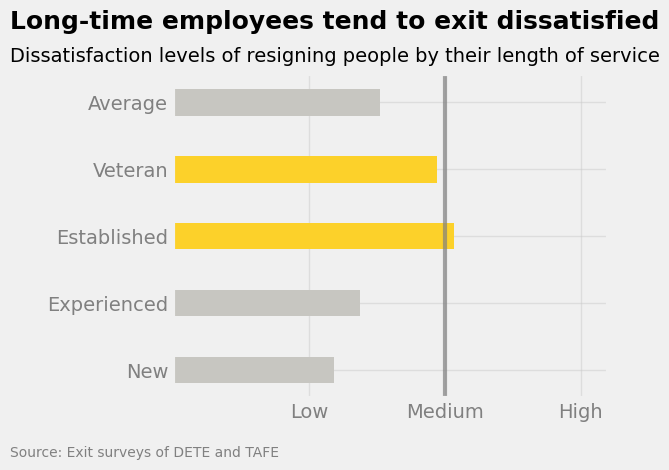

In [121]:
# Plotting the results
fig, ax = plt.subplots(figsize=(5,4), alpha=0.1)

# Creating the color map to highlight categories which are rather dissatisfied or are close to it
diss_map = combined_pivot_1['dissatisfied'] > 0.4
# Setting the colors
color_map = diss_map.map({True:'#FCD12A', False:'#C7C6C1'})

# Creating a barh plot
ax.barh(combined_pivot_1.index, combined_pivot_1['dissatisfied'], color=color_map, height=0.4)

# Setting tick parameters
ax.tick_params(axis="both", colors="grey")

# Setting min and max for x axis
ax.set_xlim(0,0.8)

# Renaming x ticks
ax.set_xticks([0.25, 0.5, 0.75], ['Low', 'Medium', 'High'])

# Renaming y ticks
ax.set_yticks(['0_New', '1_Experienced', '2_Established', '3_Veteran', 'All'],
              ['New', 'Experienced', 'Established', 'Veteran', 'Average'])

# Drawing a line at the middle level of dissatisfaction (0.5)
ax.axvline(x=0.5, c='grey', alpha=0.7, linewidth=3)

# Setting the grid transparency
ax.grid(alpha=0.5)

# Adding title
ax.text(-0.3, 5.1, 'Long-time employees tend to exit dissatisfied', weight='bold', size=18)

# Adding subtitle
ax.text(-0.3, 4.6, 'Dissatisfaction levels of resigning people by their length of service')

# Adding sources
ax.text(-0.3, -1.3, 'Source: Exit surveys of DETE and TAFE', size=10, color='grey')

plt.show()

We can conclude that employees who worked longer in the institutes tend to resign with some level of dissatisfaction, while newbies resign rather satisfied.

## Dissatisfied Employees by Age

To analyze age distribution of resigning employees we need to clean age column first.

In [122]:
combined['age'].value_counts(dropna=False)

51-55            71
NaN              55
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
36  40           32
31  35           32
26  30           32
21-25            29
31-35            29
56 or older      29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

We will use the OECD-like age categorization for employed people:
- 'young' - 15 to 25 years
- 'prime' - 26 to 55 years
- 'old' - 56 years or older

In [123]:
# Changing to string
combined['age'] = combined['age'].astype('str').str.strip()
combined['age'].value_counts(dropna=False)

51-55            71
nan              55
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
36  40           32
31  35           32
26  30           32
21-25            29
31-35            29
56 or older      29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

In [124]:
# Creating age search patterns according to categories
pattern_young = '|'.join(['21  25', '21-25', '20 or younger'])
pattern_prime = '|'.join(['41  45', '41-45', '51-55', '46-50', '36-40', '46  50', '26-30', '36  40', '31  35',
                         '26  30', '31-35'])
pattern_old = '|'.join(['56 or older', '56-60', '61 or older'])

# Adding new column with age categories
combined['age_cat'] = combined['age'].copy()
combined['age_cat'] = combined['age_cat'].str.replace(pattern_young, 'young', regex=True)
combined['age_cat'] = combined['age_cat'].str.replace(pattern_prime, 'prime', regex=True)
combined['age_cat'] = combined['age_cat'].str.replace(pattern_old, 'old', regex=True)

In [125]:
combined['age_cat'].value_counts()

prime    446
old       78
young     72
nan       55
Name: age_cat, dtype: int64

In [126]:
# Dropping NaN rows
combined_1 = combined.copy()
combined_1 = combined_1[combined_1['age_cat'] != 'nan']

In [127]:
# Calculating the percentage of dissatisfied employees for each age category
combined_pivot_2 = combined_1.pivot_table(index='age_cat', values='dissatisfied', margins=True)
combined_pivot_2

,dissatisfied
age_cat,
old,0.423077
prime,0.385650
young,0.291667
All,0.379195


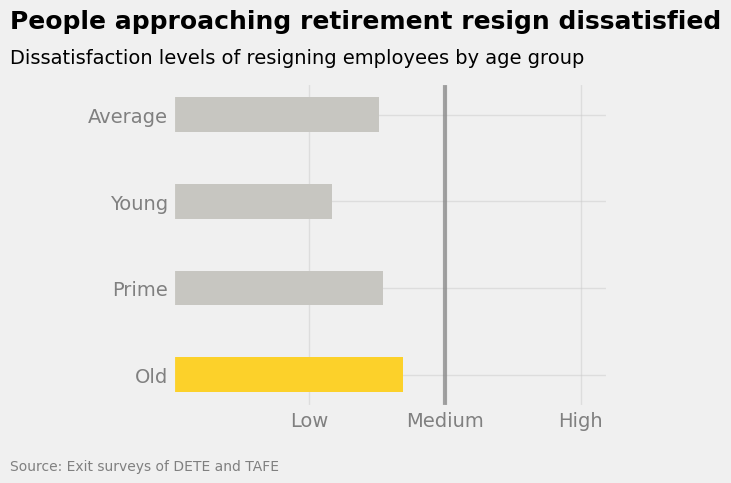

In [128]:
# Plotting the results
fig, ax = plt.subplots(figsize=(5,4), alpha=0.1)

# Creating the color map to highlight categories which are rather dissatisfied or are close to it
diss_map_2 = combined_pivot_2['dissatisfied'] > 0.4
# Setting the colors
color_map_2 = diss_map_2.map({True:'#FCD12A', False:'#C7C6C1'})

# Creating a barh plot
ax.barh(combined_pivot_2.index, combined_pivot_2['dissatisfied'], color=color_map_2, height=0.4)

# Setting tick parameters
ax.tick_params(axis="both", colors="grey")

# Setting min and max for x axis
ax.set_xlim(0,0.8)

# Renaming x ticks
ax.set_xticks([0.25, 0.5, 0.75], ['Low', 'Medium', 'High'])

# Renaming y ticks
ax.set_yticks(['All', 'young', 'prime', 'old'], ['Average', 'Young', 'Prime', 'Old'])

# Drawing a line at the middle level of dissatisfaction (0.5)
ax.axvline(x=0.5, c='grey', alpha=0.7, linewidth=3)

# Setting the grid transparency
ax.grid(alpha=0.5)

# Adding title
ax.text(-0.3, 4, 'People approaching retirement resign dissatisfied', weight='bold', size=18)

# Adding subtitle
ax.text(-0.3, 3.6, 'Dissatisfaction levels of resigning employees by age group')

# Adding sources
ax.text(-0.3, -1.1, 'Source: Exit surveys of DETE and TAFE', size=10, color='grey')

plt.show()

People passing the peak of their career and approaching retirement may feel somewhat dissatisfied when they resign, while young people are by far the most satisfied category.

## Conclusion

In this project, our aim was to analyze exit surveys from employees of the DETE and TAFE institutes in Queensland, Australia. We sought to identify whether there were any patterns or trends in employee resignations and to determine whether there were any factors that contributed to employee dissatisfaction.

Through our analysis, we discovered that employees who had worked in the institutes for a longer period of time were more likely to resign with some level of dissatisfaction, while new employees were more satisfied with their experience. Additionally, we found that age was a significant factor, with younger employees being the most satisfied and older employees being the most dissatisfied.

In conclusion, our analysis provides important insights into employee satisfaction and resignation patterns in Queensland's institutes. By identifying factors that contribute to employee dissatisfaction, we hope that our findings will help institute management develop better retention strategies and create a more positive work environment for all employees.